# Compare `q2-feature-classifier` and `rdp-classifier`

### Setup

In [96]:
import csv
from itertools import product
from collections import defaultdict, Counter

from qiime import Artifact
from q2_types import DNAIterator
from pandas import DataFrame
from numpy import zeros
import seaborn as sns

In [97]:
%matplotlib inline

### Load the results

In [98]:
seqs = Artifact.load('iceland/fmt-tutorial-rep-seqs.qza')
seq_names = [s.metadata['id'] for s in seqs.view(DNAIterator)]

In [86]:
rdp = {}
nb = {}
for confidence in range(0,101,5):
    filename = 'iceland/nb/fmt-tutorial-classification-c-%03d.qza' % confidence
    df = Artifact.load(filename).view(DataFrame)
    nb[confidence] = {ix: df['Taxon'][ix].replace(' ','') for ix in df.index}
    filename = 'iceland/rdp/rdp-%03d/rep_seq_tax_assignments.txt' % confidence
    with open(filename) as taxass:
        reader = csv.reader(taxass, delimiter='\t')
        rdp[confidence] = {r[0]: r[1] for r in reader}

### Plot some comparisons

In [99]:
matches = defaultdict(Counter)
for i,j in product(*[range(0,101,5)]*2):
    for label in seq_names:
        nb_taxon = nb[i].get(label, '')
        rdp_taxon = rdp[j].get(label, '')
        if nb_taxon.startswith(rdp_taxon) or rdp_taxon.startswith(nb_taxon):
            matches[i][j] += 1
matches = DataFrame(matches)/len(seq_names)*100
matches.index.name = 'rdp_classifier confidence'
matches.columns.name = 'q2-feature-classifier confidence'

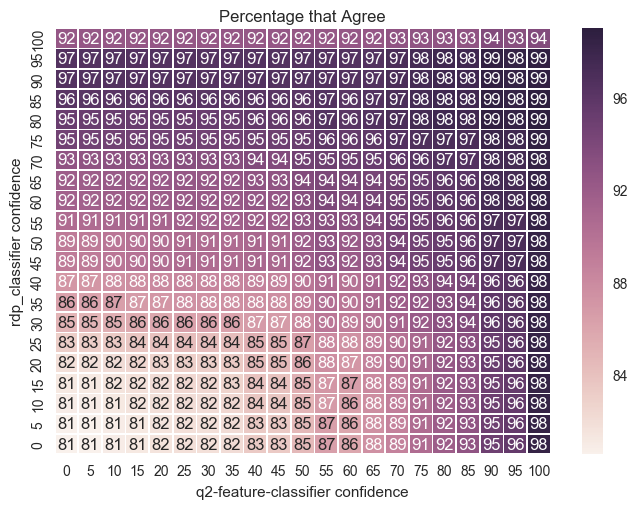

In [100]:
sns.set()
ax = sns.heatmap(matches, annot=True, linewidths=.5)
ax.invert_yaxis()
ax.set_title('Percentage that Agree')

In [103]:
matches = defaultdict(Counter)
for i,j in product(*[range(0,101,5)]*2):
    for label in seq_names:
        nb_taxon = nb[i].get(label, '')
        rdp_taxon = rdp[j].get(label, '')
        if nb_taxon == rdp_taxon:
            matches[i][j] += 1
matches = DataFrame(matches)/len(seq_names)*100
matches.index.name = 'rdp_classifier confidence'
matches.columns.name = 'q2-feature-classifier confidence'

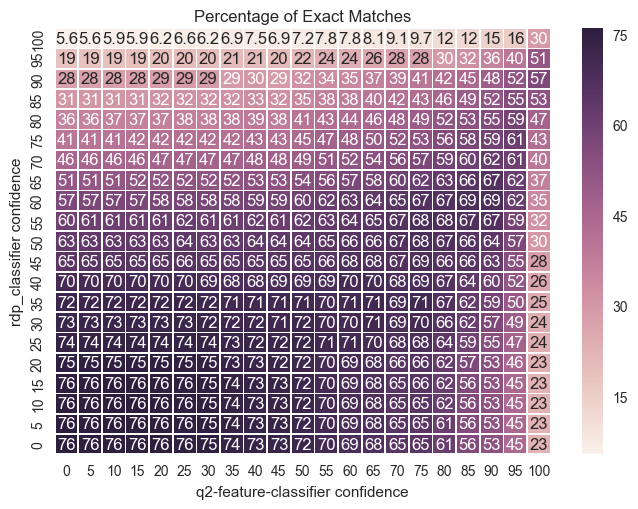

In [104]:
sns.set()
ax = sns.heatmap(matches, annot=True, linewidths=.5)
ax.invert_yaxis()
ax.set_title('Percentage of Exact Matches')